# Contour plots
> Highly customizable

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

<img src="python_figures/contours.png" alt="contours" width="600">

## Introduction

Contour plots are great to show how a variable depends on two parameters.

## The code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Math
# %matplotlib inline

configure plotting preferences

In [2]:
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
# this is a latex constant, don't change it.
pts_per_inch = 72.27
# write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
text_width_in_pts = 246.0
# inside a figure environment in latex, the result will be on the
# dvi/pdf next to the figure. See url above.
text_width_in_inches = text_width_in_pts / pts_per_inch
# make rectangles with a nice proportion
golden_ratio = 0.618
# figure.png or figure.eps will be intentionally larger, because it is prettier
inverse_latex_scale = 2
# when compiling latex code, use
# \includegraphics[scale=(1/inverse_latex_scale)]{figure}
# we want the figure to occupy 2/3 (for example) of the text width
fig_proportion = (3.0 / 3.0)
csize = inverse_latex_scale * fig_proportion * text_width_in_inches
# always 1.0 on the first argument
fig_size = (1.0 * csize,golden_ratio * csize)
# find out the fontsize of your latex text, and put it here
text_size = inverse_latex_scale * 12
tick_size = inverse_latex_scale * 8
# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {'backend': 'ps',
          'axes.labelsize': text_size,
          'legend.fontsize': tick_size,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family': 'serif',
          'font.size': text_size,
          # Times, Palatino, New Century Schoolbook,
          # Bookman, Computer Modern Roman
          'font.serif': ['Times'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          'figure.figsize': fig_size,
          # include here any neede package for latex
          'text.latex.preamble': [r'\usepackage{amsmath}',
                                  ],
          }
plt.rcParams.update(params)
plt.ioff()
plt.clf()
# figsize accepts only inches.
fig = plt.figure(1, figsize=fig_size)
fig.subplots_adjust(left=0.12, right=0.96, top=0.96, bottom=0.18,
                    hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

In [3]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('YlOrBr')
my_cmap = truncate_colormap(cmap, 0.2, 0.9)

/Users/yairmau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


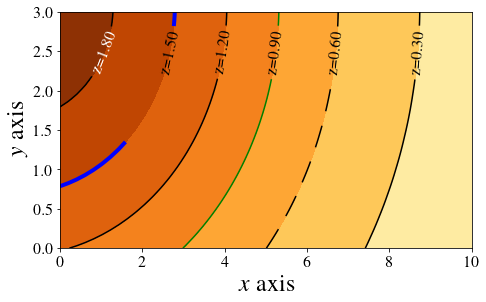

In [4]:
minX = 0
maxX = 10
minY = 0
maxY = 3
N = 50j
y, x = np.mgrid[minY:maxY:N, minX:maxX:N]
z = 2 * np.exp(-(0.02 * (x + 1) ** 2 + 0.05 * (y - 3.1) **2 ))

divisions = np.arange(0.3, 2.1, 0.3)
divisions2 = np.append(divisions, 2.5)
divisions2 = np.append(-0.5, divisions2)
# contour filled with colors
ax.contourf(x, y, z, divisions2, cmap=my_cmap, vmin=0.0,vmax=2.0)

# contour lines
cont = ax.contour(x, y, z, divisions,
                  colors=2 * ['black'] + ['green'] + 3 * ['black'],
                  linewidth=.5)
zcontour = cont.collections[1]
dash1=(15, 10, 15, 10)
zcontour.set_dashes([(0, dash1)])
zcontour = cont.collections[4]
dash2=(20, 30)
zcontour.set(color='blue', linestyle=[(0, dash2)], linewidth=4)

# labels
manual_locations = [(1.0, 2.5), (2.5, 2.5),
                    (3.8, 2.5), (5.0, 2.5),
                    (6.2, 2.5), (8.3, 2.5)]
ax.clabel(cont, inline=1, fontsize=tick_size,
          fmt='z=%.2f%%', manual=manual_locations,
          colors=5 * ['black'] + ['white'])

ax.set_xlabel(r"$x$ axis")
ax.set_ylabel(r"$y$ axis")

fig

In [5]:
%matplotlib notebook
fig.savefig("./python_figures/contours.png",dpi=300)
# fig.savefig("cont.eps")